In [16]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [17]:
#Load dataset from CSV file
dataset = pd.read_csv('data/dataset.csv')

In [18]:
#Add all sales to get Total Net Sale
df = dataset.groupby('date', as_index = False).sum().round(2)

In [19]:
df

date       order_id  quantity  unit_price  unit_cogs  brand_id  \
0    2019-06-01   247010138661       157     3458.94    1943.87      8542   
1    2019-06-02    17100732010         7       85.17      46.27       331   
2    2019-06-03    95004080862        37     1351.81     818.72      3089   
3    2019-06-04  4913608532244      2583    70452.71   42176.95    146898   
4    2019-06-05  5088416821504      2586    65441.95   20088.45    143445   
..          ...            ...       ...         ...        ...       ...   
953  2022-01-10  8113663535614      3938   107042.19   67683.67    226352   
954  2022-01-11  7847468373138      3773   110367.10   71173.65    222232   
955  2022-01-12  7543872212697      3721    99703.79   64159.69    213979   
956  2022-01-13  7403076990931      3782    94480.41   60457.82    203970   
957  2022-01-14  1524616614764       751    18190.65   11689.01     41000   

     net_sales  gross_profit  
0      4121.07       1879.38  
1        78.76         32.49  
2      1354.00        491.23  
3     70505.74      28270.82  
4     66236.44      45663.40  
..         ...           ...  
953  109472.94      40239.47  
954  112798.63      40030.77  
955  102618.52      36740.92  
956   99848.20      36292.39  
957   18895.40       6775.38  

[958 rows x 8 columns]

In [20]:
#Dataset date range
print( 'Dataset date range starts on', df['date'].min(), 'and ends on', df['date'].max())

Dataset date range starts on 2019-06-01 and ends on 2022-01-14


#### 1. Building a Prophet model to forecast Sales 

##### 1.1. Total Sales 

##### 1.1.1. Forecast

In [6]:
#Build the df model 
df_model = df[['date','net_sales']].rename(columns={'date': 'ds','net_sales':'y' })
df_model.tail()

ds          y
953  2022-01-10  109472.94
954  2022-01-11  112798.63
955  2022-01-12  102618.52
956  2022-01-13   99848.20
957  2022-01-14   18895.40

In [7]:
#Creat instance and fit the model
m = Prophet()
m.fit(df_model)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
#Configure the length of the prediction
future = m.make_future_dataframe(periods=365)
future.tail()

ds
1318 2023-01-10
1319 2023-01-11
1320 2023-01-12
1321 2023-01-13
1322 2023-01-14

In [9]:
#Forecast the future values
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
1318 2023-01-10  141290.532818  119912.837153  161597.805955
1319 2023-01-11  140007.875336  118423.700091  160370.397095
1320 2023-01-12  137892.407264  116916.358246  158397.980903
1321 2023-01-13  135559.891148  114353.982445  154568.792634
1322 2023-01-14  131795.952577  111229.090472  152958.689634

Text(56.472222222222214, 0.5, 'Net Sales [Euros]')

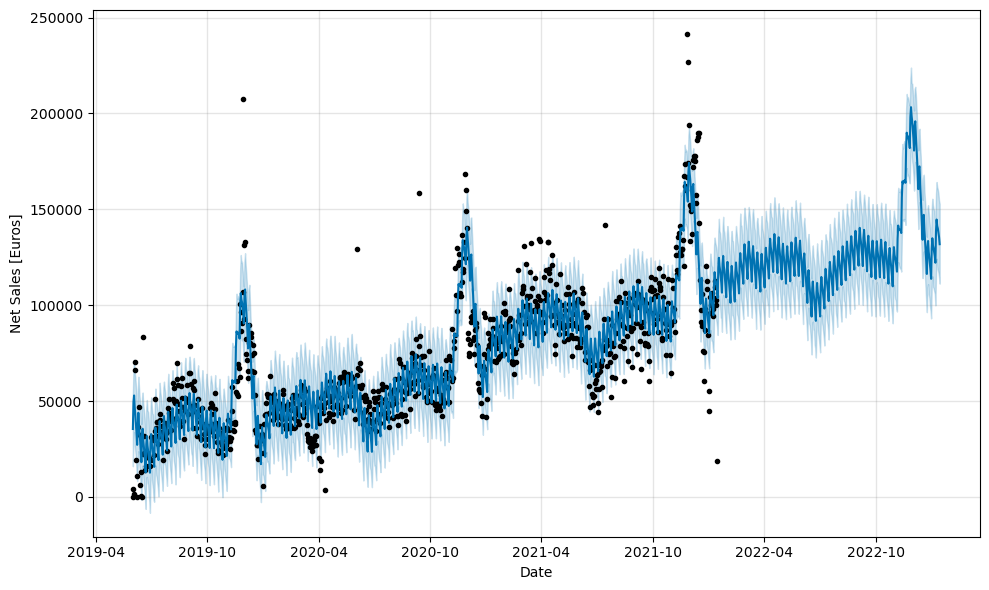

In [12]:
#Graph of historical and forecasted net sales values
fig1 = m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Net Sales [Euros]")

##### 1.1.2. Analysis of trend and yearly and weekly seasonal components

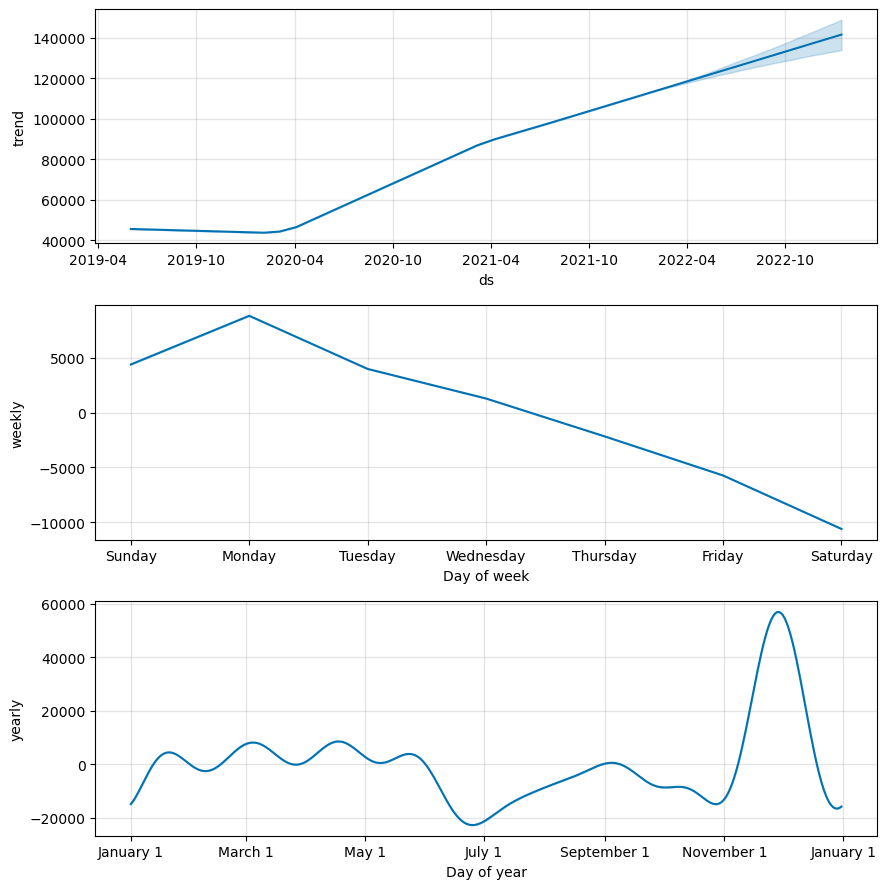

In [13]:
fig2 = m.plot_components(forecast)

In [15]:
plot_plotly(m, forecast)

##### 1.2. Sales in the Top countries

In [25]:
#Find the top countries in terms of Net Sales
df1 = dataset.groupby(['country'], as_index = False).sum().round(2).sort_values(by=['net_sales'], ascending=False).head(8)

In [26]:
df1

country          order_id  quantity   unit_price    unit_cogs  \
4   Czech Republic  1440161581367776    723535  19828409.51  12053442.87   
18        Slovakia   729161558598050    368945  10726513.89   6582573.30   
17         Romania   562967268570540    283805   8433036.25   5170098.46   
9          Hungary   580780784731316    294072   8336818.76   5097532.50   
20           Spain   243752930330663    122827   3968757.77   2441216.24   
8          Germany   249716555503977    126437   3820826.22   2350949.13   
7           France   149198109429140     75780   2567663.27   1591338.15   
11           Italy    84911058810368     43226   1710109.92   1068754.35   

    brand_id    net_sales  gross_profit  
4   38878295  20115443.05    7819799.78  
18  20962203  10899675.59    4192971.97  
17  16288244   8553066.20    3288502.88  
9   16739715   8473360.32    3267371.97  
20   7528536   4028536.38    1543859.90  
8    7505642   3882677.63    1487149.05  
7    4930566   2612078.80     989786.91  
11   3186376   1737217.47     650994.43

Similarly to what it was found in the EDA section: Czech Republic, Slovakia, Romania, Hungary, Spain, and Germany are the top 6 countries but in this case in terms of the amount of net sales.

##### 1.2.1. Czech Republic

In [23]:
#Group data to work with specific info of Czech Republic
df_cz = dataset.groupby(['date','country'], as_index = False).sum().round(2)


In [24]:
df_cz = df_cz.loc[(df_cz['country'] == 'Czech Republic')] 


##### 1.2.1.1. Forecast

In [25]:
#Build the df model for Czech Republic
df_cz_model = df_cz[['date','net_sales']].rename(columns={'date': 'ds','net_sales':'y' })
df_cz_model.tail()

ds         y
16063  2022-01-10  30606.28
16083  2022-01-11  29356.35
16103  2022-01-12  30085.29
16123  2022-01-13  27248.29
16144  2022-01-14   4431.22

In [26]:
#Creat instance and fit the model
m_cz = Prophet()
m_cz.fit(df_cz_model)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
#Configure the length of the prediction
future_cz = m_cz.make_future_dataframe(periods=365)
future_cz.tail()

ds
1317 2023-01-10
1318 2023-01-11
1319 2023-01-12
1320 2023-01-13
1321 2023-01-14

In [28]:
#Forecast the future values
forecast_cz = m_cz.predict(future_cz)
forecast_cz[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1317 2023-01-10  34531.941821  27937.913511  40266.564629
1318 2023-01-11  34044.712301  27939.006213  40241.818185
1319 2023-01-12  33565.928525  27448.546290  40016.257206
1320 2023-01-13  32606.184850  26073.293047  39188.986776
1321 2023-01-14  31638.071486  25407.953310  37974.777673

Text(65.34722222222221, 0.5, 'Net Sales [Euros]')

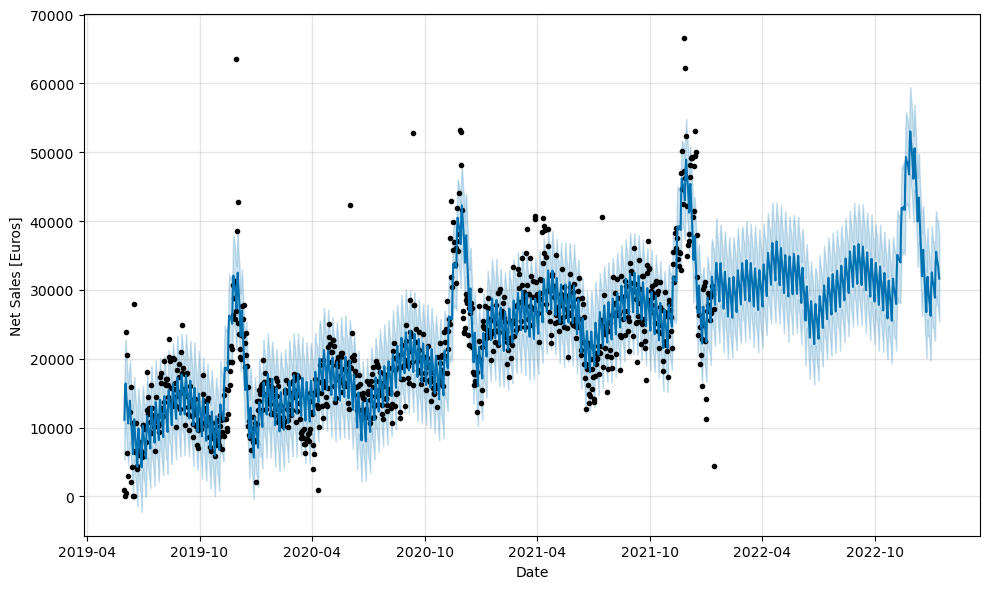

In [29]:
#Graph of historical and forecasted net sales values in Czech Republic
fig11 = m_cz.plot(forecast_cz)
plt.xlabel("Date")
plt.ylabel("Net Sales [Euros]")

##### 1.2.1.2. Analysis of trend and yearly and weekly seasonal components

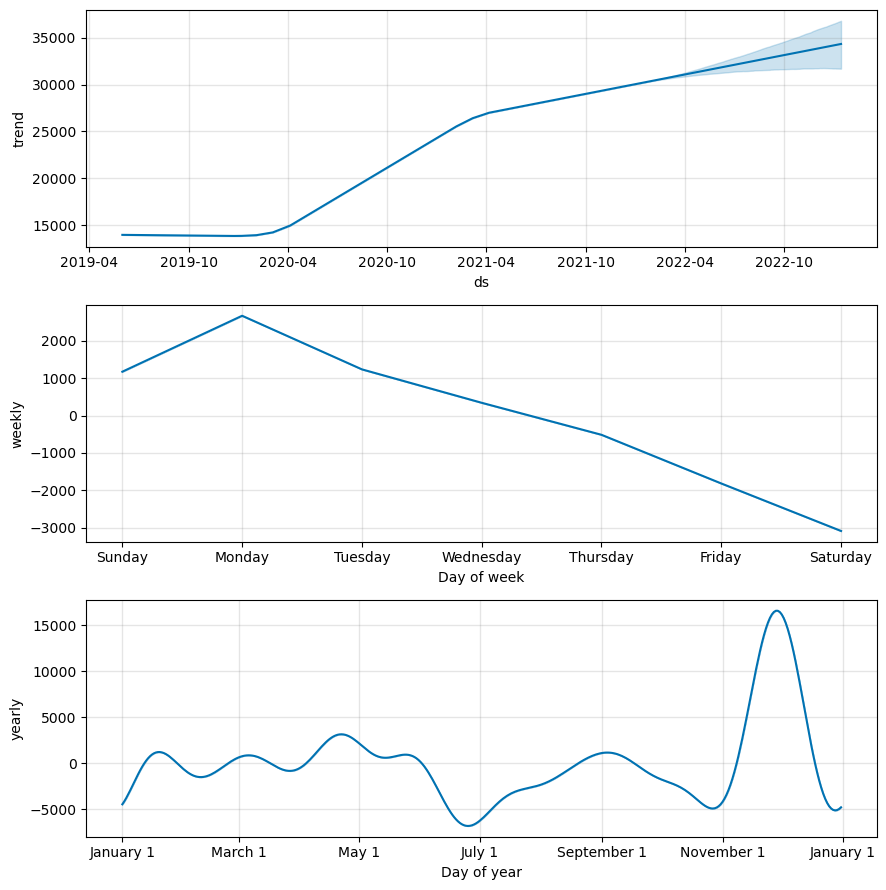

In [34]:
#Graphs of trend and yearly and weekly seasonal components
fig12 = m_cz.plot_components(forecast_cz)

In [35]:
plot_plotly(m_cz, forecast_cz)

##### 1.2.2. Slovakia

In [30]:
#Group data to work with specific info of Slovakia
df_sk = dataset.groupby(['date','country'], as_index = False).sum().round(2)

In [31]:
df_sk = df_sk.loc[(df_sk['country'] == 'Slovakia')] 

##### 1.2.2.1. Forecast

In [32]:
#Build the df model for Slovakia
df_sk_model = df_sk[['date','net_sales']].rename(columns={'date': 'ds','net_sales':'y' })
df_sk_model.tail()

ds         y
16076  2022-01-10  14893.69
16096  2022-01-11  16599.22
16116  2022-01-12  16595.02
16137  2022-01-13  15489.17
16157  2022-01-14   2277.78

In [33]:
#Creat instance and fit the model
m_sk = Prophet()
m_sk.fit(df_sk_model)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
#Configure the length of the prediction
future_sk = m_sk.make_future_dataframe(periods=365)
future_sk.tail()

ds
1317 2023-01-10
1318 2023-01-11
1319 2023-01-12
1320 2023-01-13
1321 2023-01-14

In [35]:
#Forecast the future values
forecast_sk = m_sk.predict(future_sk)
forecast_sk[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1317 2023-01-10  20026.841778  16574.068958  23342.547931
1318 2023-01-11  19828.155213  16136.041162  23259.831544
1319 2023-01-12  19282.999524  15931.611610  22900.423914
1320 2023-01-13  18958.782401  15374.257485  22407.190581
1321 2023-01-14  18389.742190  14781.796329  21671.435097

Text(65.34722222222221, 0.5, 'Net Sales [Euros]')

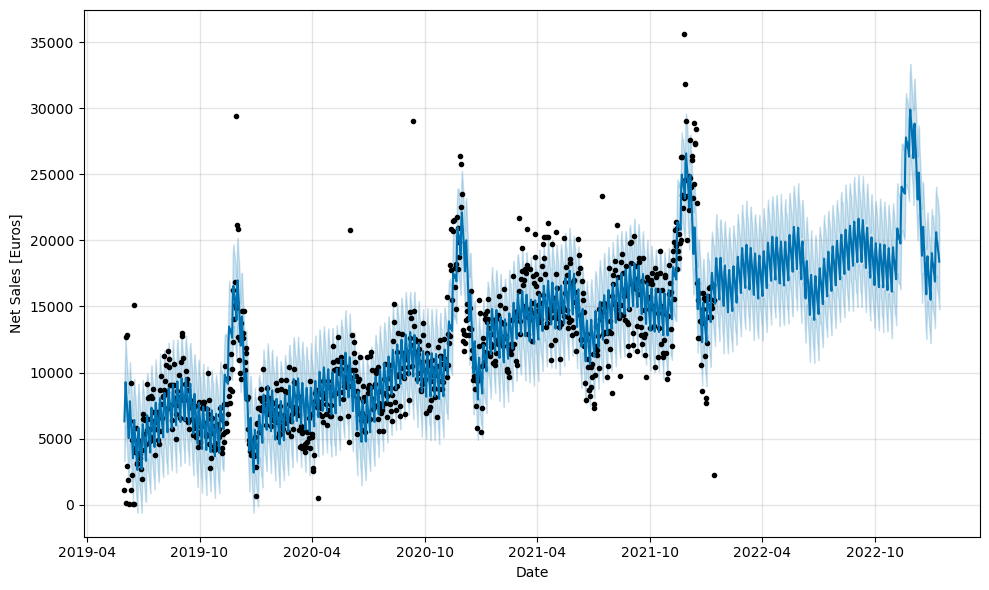

In [36]:
#Graph of historical and forecasted net sales values in Slovakia
fig21 = m_sk.plot(forecast_sk)
plt.xlabel("Date")
plt.ylabel("Net Sales [Euros]")

##### 1.2.2.2. Analysis of trend and yearly and weekly seasonal components

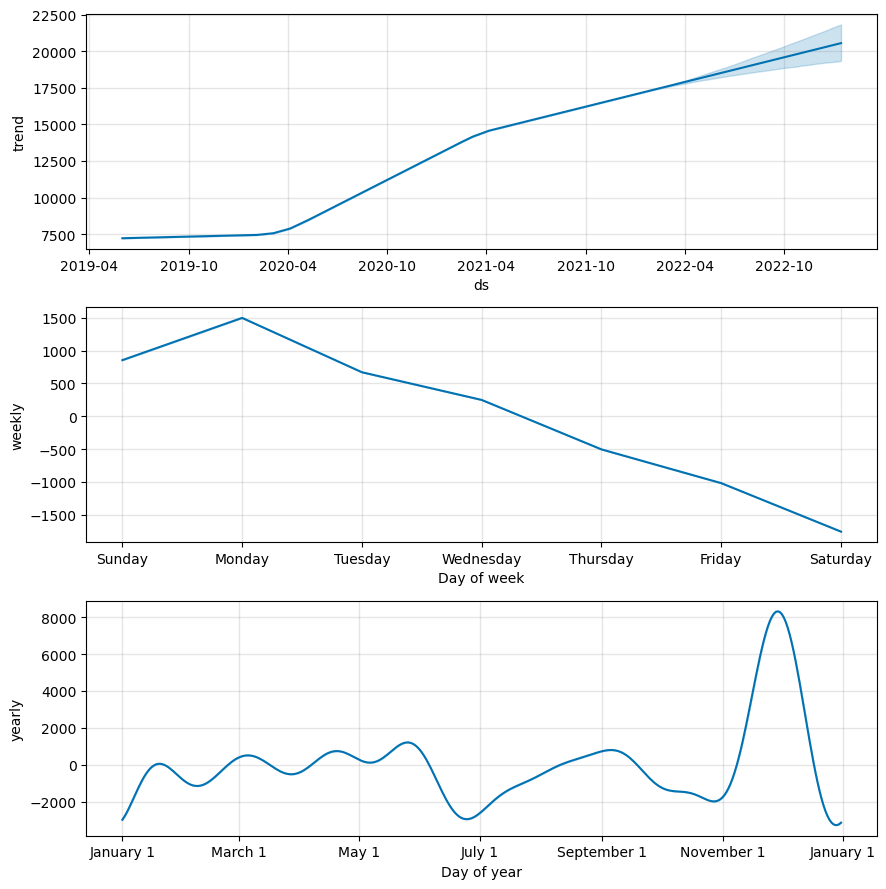

In [43]:
#Graphs of trend and yearly and weekly seasonal components
fig22 = m_sk.plot_components(forecast_sk)

In [44]:
plot_plotly(m_sk, forecast_sk)

##### 1.2.3. Romania

In [37]:
#Group data to work with specific info of Romania
df_ro = dataset.groupby(['date','country'], as_index = False).sum().round(2)

In [38]:
df_ro = df_ro.loc[(df_ro['country'] == 'Romania')] 

##### 1.2.3.1. Forecast

In [39]:
#Build the df model for Romania
df_ro_model = df_ro[['date','net_sales']].rename(columns={'date': 'ds','net_sales':'y' })
df_ro_model.tail()

ds         y
16075  2022-01-10  17484.22
16095  2022-01-11  17621.39
16115  2022-01-12  15109.37
16136  2022-01-13  15638.70
16156  2022-01-14   2007.60

In [40]:
#Creat instance and fit the model
m_ro = Prophet()
m_ro.fit(df_ro_model)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
#Configure the length of the prediction
future_ro = m_ro.make_future_dataframe(periods=365)
future_ro.tail()

ds
1315 2023-01-10
1316 2023-01-11
1317 2023-01-12
1318 2023-01-13
1319 2023-01-14

In [42]:
#Forecast the future values
forecast_ro = m_ro.predict(future_ro)
forecast_ro[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1315 2023-01-10  20709.148199  17288.113461  23950.028333
1316 2023-01-11  20524.214864  17352.937752  23807.499274
1317 2023-01-12  20293.383608  17292.899260  23538.640658
1318 2023-01-13  20165.591277  17124.056853  23335.229533
1319 2023-01-14  19527.972867  16304.608880  22688.807508

Text(65.34722222222221, 0.5, 'Net Sales [Euros]')

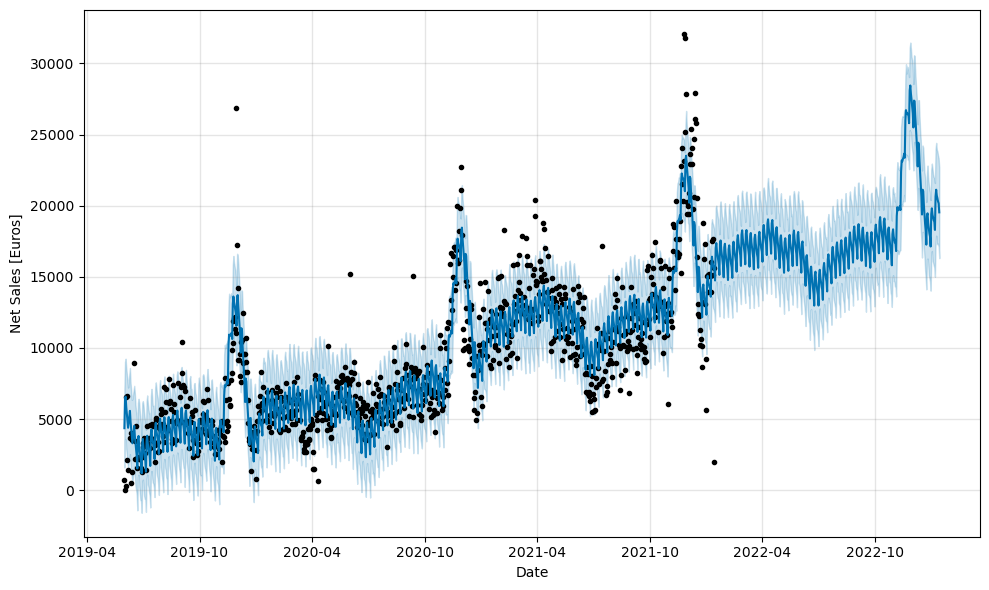

In [43]:
#Graph of historical and forecasted net sales values in Romania
fig31 = m_ro.plot(forecast_ro)
plt.xlabel("Date")
plt.ylabel("Net Sales [Euros]")

##### 1.2.3.2. Analysis of trend and yearly and weekly seasonal components

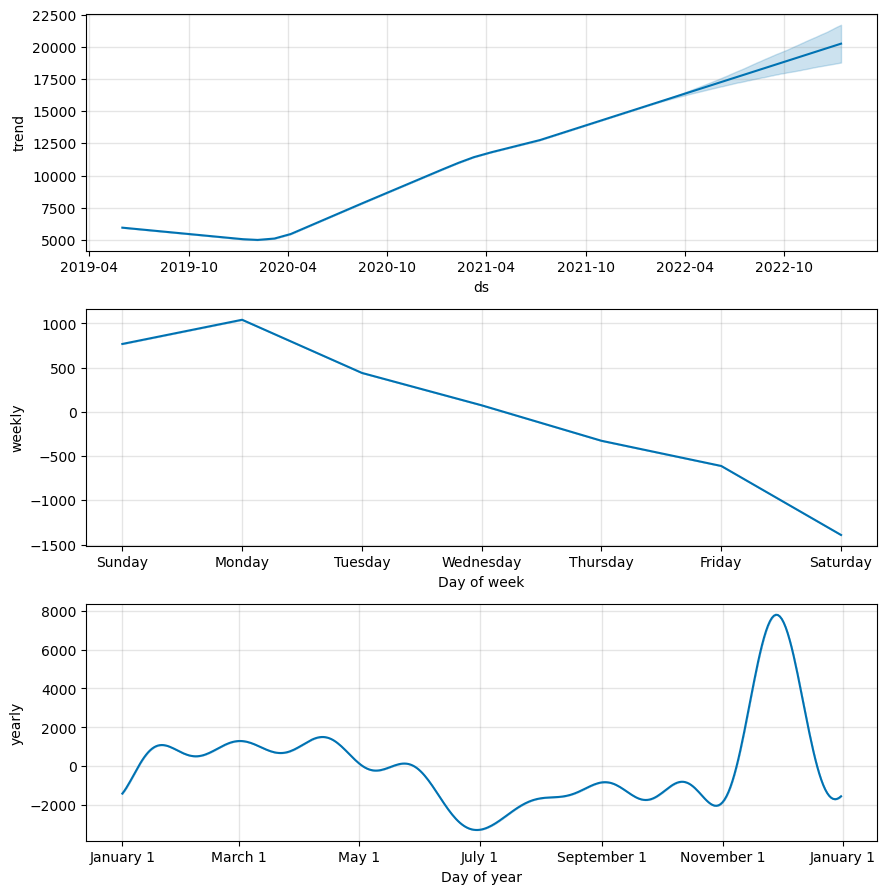

In [52]:
#Graphs of trend and yearly and weekly seasonal components
fig32 = m_ro.plot_components(forecast_ro)

In [53]:
plot_plotly(m_ro, forecast_ro)

##### 1.2.4. Hungary

In [44]:
#Group data to work with specific info of Hungary
df_hu = dataset.groupby(['date','country'], as_index = False).sum().round(2)

In [45]:
df_hu = df_hu.loc[(df_hu['country'] == 'Hungary')] 

##### 1.2.4.1. Forecast

In [46]:
#Build the df model for Hungary
df_hu_model = df_hu[['date','net_sales']].rename(columns={'date': 'ds','net_sales':'y' })
df_hu_model.tail()

ds         y
16068  2022-01-10  12203.83
16088  2022-01-11  13096.11
16108  2022-01-12  10267.21
16128  2022-01-13   9637.03
16148  2022-01-14   2281.91

In [47]:
#Creat instance and fit the model
m_hu = Prophet()
m_hu.fit(df_hu_model)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
#Configure the length of the prediction
future_hu = m_hu.make_future_dataframe(periods=365)
future_hu.tail()

ds
1317 2023-01-10
1318 2023-01-11
1319 2023-01-12
1320 2023-01-13
1321 2023-01-14

In [49]:
#Forecast the future values
forecast_hu = m_hu.predict(future_hu)
forecast_hu[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1317 2023-01-10  13697.769054  11077.247734  16476.803346
1318 2023-01-11  13594.405663  10918.760689  16225.353600
1319 2023-01-12  13223.818331  10485.314553  15894.037216
1320 2023-01-13  12918.165293  10201.108275  15551.296848
1321 2023-01-14  12378.817997   9630.030883  15095.319374

Text(65.34722222222221, 0.5, 'Net Sales [Euros]')

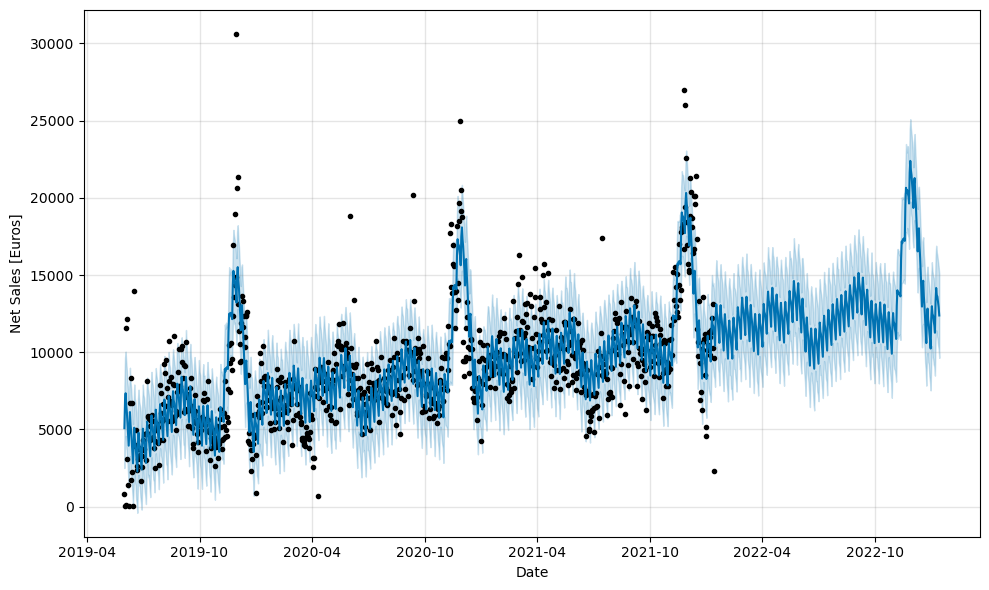

In [50]:
#Graph of historical and forecasted net sales values in Hungary
fig41 = m_hu.plot(forecast_hu)
plt.xlabel("Date")
plt.ylabel("Net Sales [Euros]")

##### 1.2.4.2. Analysis of trend and yearly and weekly seasonal components

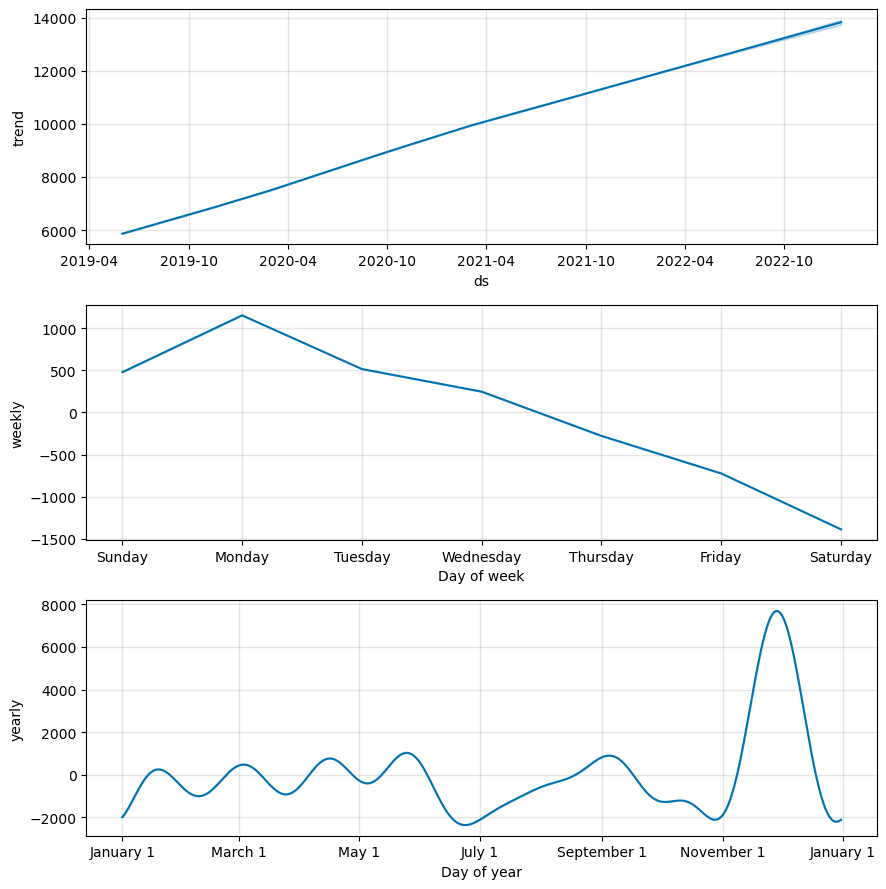

In [61]:
#Graphs of trend and yearly and weekly seasonal components
fig42 = m_hu.plot_components(forecast_hu)

In [62]:
plot_plotly(m_hu, forecast_hu)

##### 1.2.5. Spain

In [51]:
#Group data to work with specific info of Spain
df_es = dataset.groupby(['date','country'], as_index = False).sum().round(2)

In [52]:
df_es = df_es.loc[(df_es['country'] == 'Spain')] 

##### 1.2.5.1. Forecast

In [53]:
#Build the df model for Spain
df_es_model = df_es[['date','net_sales']].rename(columns={'date': 'ds','net_sales':'y' })
df_es_model.tail()

ds        y
16078  2022-01-10  8649.35
16098  2022-01-11  8908.65
16118  2022-01-12  7147.32
16139  2022-01-13  5833.34
16159  2022-01-14   542.60

In [54]:
#Creat instance and fit the model
m_es = Prophet()
m_es.fit(df_es_model)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
#Configure the length of the prediction
future_es = m_es.make_future_dataframe(periods=365)
future_es.tail()

ds
1315 2023-01-10
1316 2023-01-11
1317 2023-01-12
1318 2023-01-13
1319 2023-01-14

In [56]:
#Forecast the future values
forecast_es = m_es.predict(future_es)
forecast_es[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1315 2023-01-10  19623.719752  17420.382447  21923.969211
1316 2023-01-11  19636.671843  17603.195298  21680.784205
1317 2023-01-12  19647.839882  17561.588646  21663.941092
1318 2023-01-13  19473.578287  17263.772218  21580.340832
1319 2023-01-14  19430.861165  17322.260193  21619.622721

Text(65.34722222222221, 0.5, 'Net Sales [Euros]')

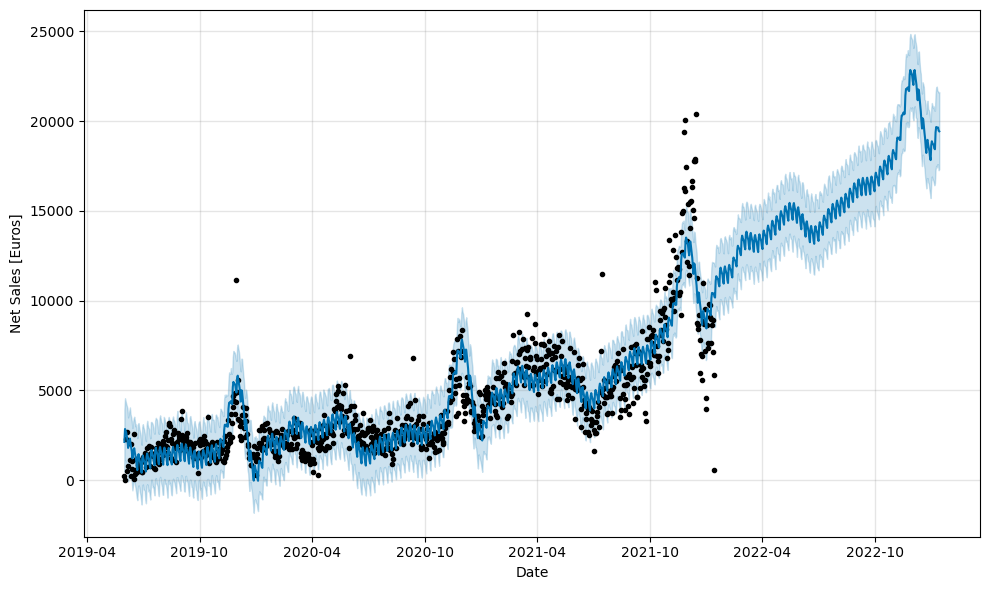

In [57]:
#Graph of historical and forecasted net sales values in Spain
fig51 = m_es.plot(forecast_es)
plt.xlabel("Date")
plt.ylabel("Net Sales [Euros]")

##### 1.2.5.2. Analysis of trend and yearly and weekly seasonal components

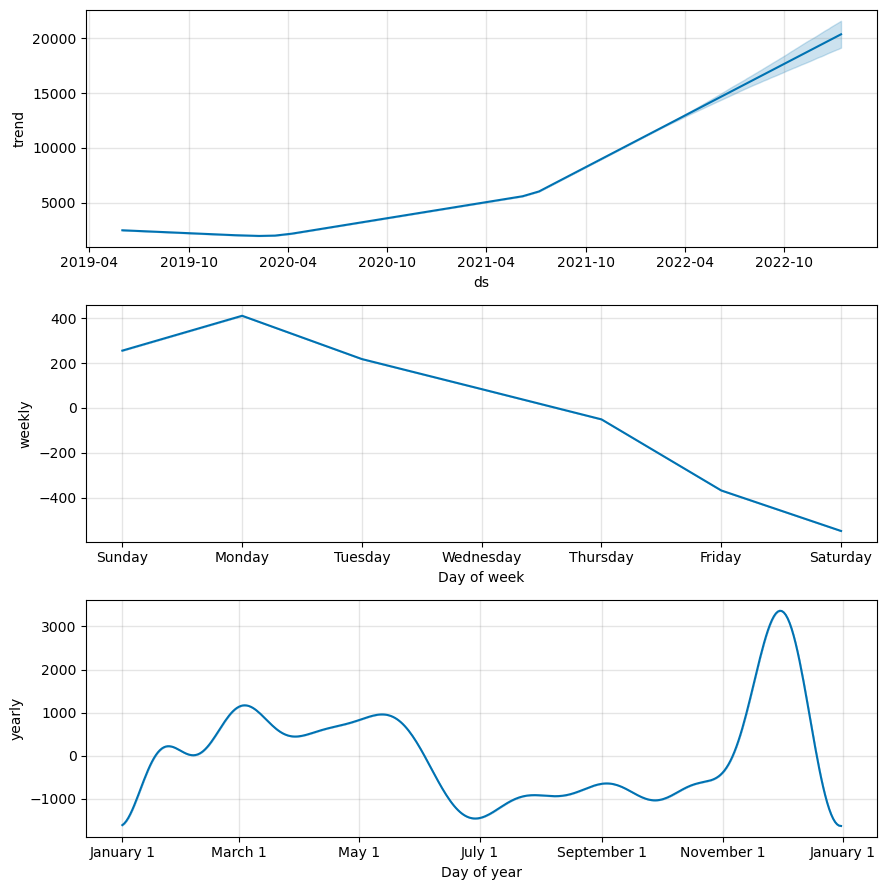

In [70]:
#Graphs of trend and yearly and weekly seasonal components
fig52 = m_es.plot_components(forecast_es)

In [71]:
plot_plotly(m_es, forecast_es)

##### 1.2.6. Germany

In [58]:
#Group data to work with specific info of Germany
df_de = dataset.groupby(['date','country'], as_index = False).sum().round(2)

In [59]:
df_de = df_de.loc[(df_de['country'] == 'Germany')] 

##### 1.2.6.1. Forecast

In [60]:
#Build the df model for Germany
df_de_model = df_de[['date','net_sales']].rename(columns={'date': 'ds','net_sales':'y' })
df_de_model.tail()

ds        y
16067  2022-01-10  5397.87
16087  2022-01-11  5102.69
16107  2022-01-12  4251.69
16127  2022-01-13  6347.86
16147  2022-01-14   843.66

In [61]:
#Creat instance and fit the model
m_de = Prophet()
m_de.fit(df_de_model)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
#Configure the length of the prediction
future_de = m_de.make_future_dataframe(periods=365)
future_de.tail()

ds
1314 2023-01-10
1315 2023-01-11
1316 2023-01-12
1317 2023-01-13
1318 2023-01-14

In [63]:
#Forecast the future values
forecast_de = m_de.predict(future_de)
forecast_de[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
1314 2023-01-10  5858.620980  4309.602959  7350.184434
1315 2023-01-11  5658.114785  4229.215946  7145.334093
1316 2023-01-12  5547.802620  3886.902527  7098.061244
1317 2023-01-13  5333.689353  3861.734180  6814.843418
1318 2023-01-14  5182.270291  3647.197253  6596.225867

Text(65.34722222222221, 0.5, 'Net Sales [Euros]')

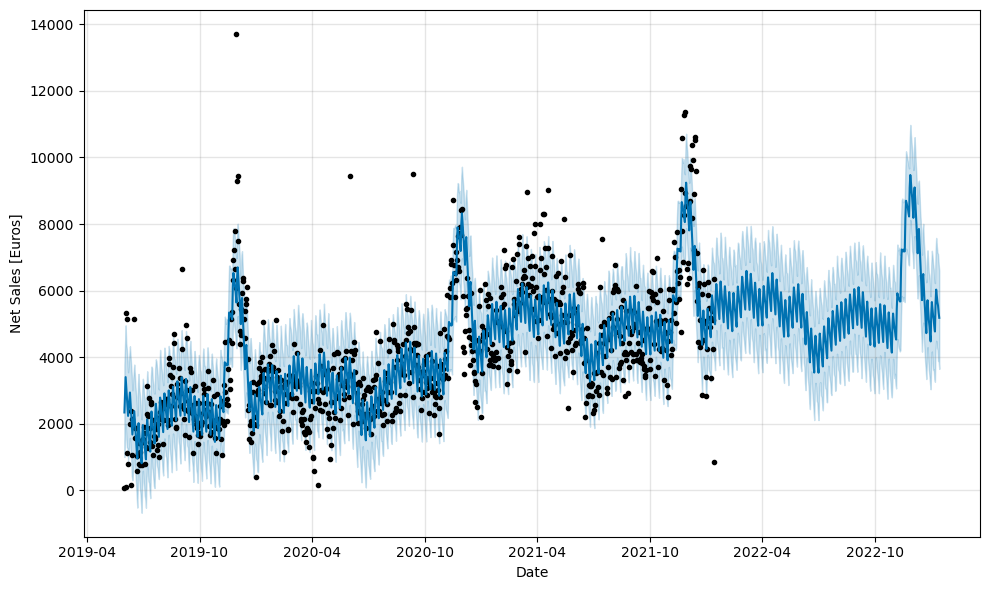

In [64]:
#Graph of historical and forecasted net sales values in Germany
fig61 = m_de.plot(forecast_de)
plt.xlabel("Date")
plt.ylabel("Net Sales [Euros]")

##### 1.2.6.2. Analysis of trend and yearly and weekly seasonal components

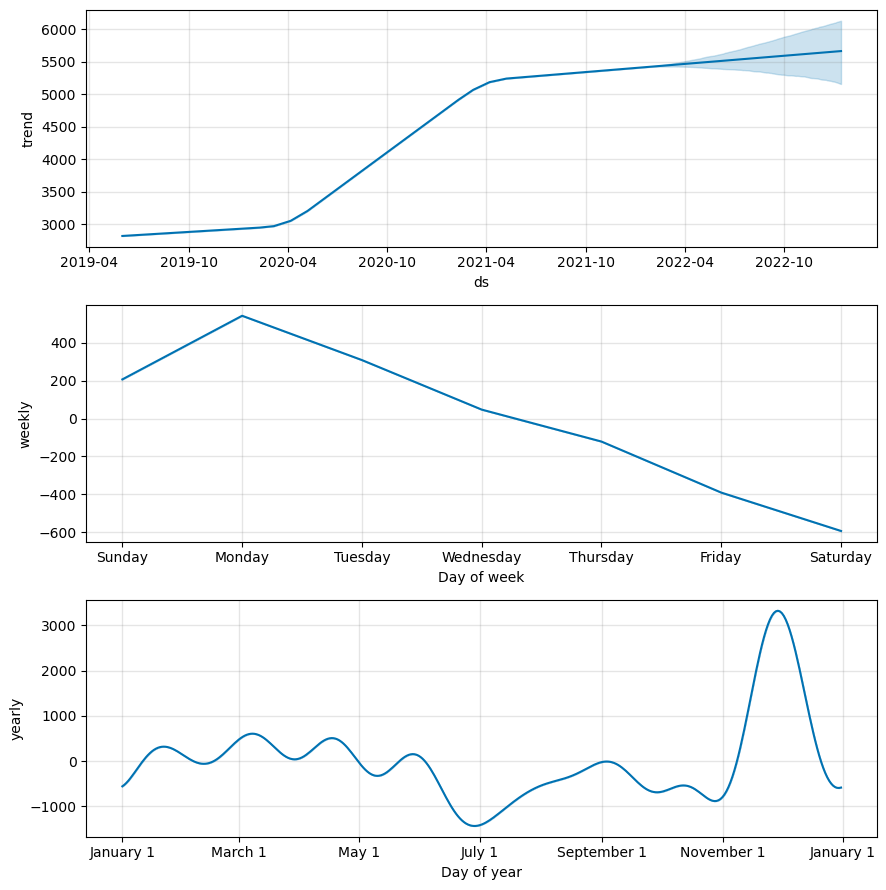

In [79]:
#Graphs of trend and yearly and weekly seasonal components
fig62 = m_de.plot_components(forecast_de)

In [80]:
plot_plotly(m_de, forecast_de)

##### Joining Data

In [124]:
#Join orders_model and items_model dataframes
all = forecast.rename(columns={'yhat': 'y_pred_all'})[['ds' ,'y_pred_all']].round(2)
cz = forecast_cz.rename(columns={'yhat': 'y_pred_cz'})[['ds' ,'y_pred_cz']].round(2)
sk = forecast_sk.rename(columns={'yhat': 'y_pred_sk'})[['ds' ,'y_pred_sk']].round(2)
ro = forecast_ro.rename(columns={'yhat': 'y_pred_ro'})[['ds' ,'y_pred_ro']].round(2)
hu = forecast_hu.rename(columns={'yhat': 'y_pred_hu'})[['ds' ,'y_pred_hu']].round(2)
es = forecast_es.rename(columns={'yhat': 'y_pred_es'})[['ds' ,'y_pred_es']].round(2)
de = forecast_de.rename(columns={'yhat': 'y_pred_de'})[['ds' ,'y_pred_de']].round(2)

In [125]:
all_cz = pd.merge(all, cz, how ='inner', on ='ds')
all_cz_sk = pd.merge(all_cz, sk, how ='inner', on ='ds')
all_cz_sk_ro = pd.merge(all_cz_sk, ro, how ='inner', on ='ds')
all_cz_sk_ro_hu = pd.merge(all_cz_sk_ro, hu, how ='inner', on ='ds')
all_cz_sk_ro_hu_es = pd.merge(all_cz_sk_ro_hu, es, how ='inner', on ='ds')
all_cz_sk_ro_hu_es_de = pd.merge(all_cz_sk_ro_hu_es, de, how ='inner', on ='ds')

In [126]:
all_cz_sk_ro_hu_es_de

ds  y_pred_all  y_pred_cz  y_pred_sk  y_pred_ro  y_pred_hu  \
0    2019-06-01    35396.15   11128.61    6310.36    4355.05    5076.19   
1    2019-06-04    46897.00   14682.52    8272.57    5851.49    6547.71   
2    2019-06-05    42983.22   13470.39    7663.27    5354.09    6112.43   
3    2019-06-06    38255.95   12270.54    6709.47    4813.97    5413.86   
4    2019-06-07    33363.95   10602.33    5984.08    4383.31    4789.03   
...         ...         ...        ...        ...        ...        ...   
1313 2023-01-10   141290.53   34531.94   20026.84   20709.15   13697.77   
1314 2023-01-11   140007.88   34044.71   19828.16   20524.21   13594.41   
1315 2023-01-12   137892.41   33565.93   19283.00   20293.38   13223.82   
1316 2023-01-13   135559.89   32606.18   18958.78   20165.59   12918.17   
1317 2023-01-14   131795.95   31638.07   18389.74   19527.97   12378.82   

      y_pred_es  y_pred_de  
0       2122.22    2338.62  
1       2638.30    3119.27  
2       2417.33    2802.61  
3       2194.77    2571.94  
4       1789.52    2234.90  
...         ...        ...  
1313   19623.72    5858.62  
1314   19636.67    5658.11  
1315   19647.84    5547.80  
1316   19473.58    5333.69  
1317   19430.86    5182.27  

[1318 rows x 8 columns]

In [128]:
#Store predictions into CSV file
all_cz_sk_ro_hu_es_de.to_csv(r'data/sales_pred.csv', index=False, sep=',') 